## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [66]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.3500,5.5900,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.7500,9.5400,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.2500,9.8500,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.8500,4.1500,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.6000,6.8700,42450,Diesel,Dealer,Manual,0


In [67]:
df.shape

(301, 9)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [69]:
df.isnull().any().any()

False

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0000,2013.6279,2.8916,2003.0000,2012.0000,2014.0000,2016.0000,2018.0000
Selling_Price,301.0000,4.6613,5.0828,0.1000,0.9000,3.6000,6.0000,35.0000
Present_Price,301.0000,7.6285,8.6441,0.3200,1.2000,6.4000,9.9000,92.6000
Kms_Driven,301.0000,36947.2060,38886.8839,500.0000,15000.0000,32000.0000,48767.0000,500000.0000
Owner,301.0000,0.0432,0.2479,0.0000,0.0000,0.0000,0.0000,3.0000


In [71]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.3500,5.5900,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.7500,9.5400,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.2500,9.8500,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.8500,4.1500,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.6000,6.8700,42450,Diesel,Dealer,Manual,0


In [72]:
df["vehicle_age"]=2023-df.Year

In [73]:
df.Car_Name.value_counts().head(10)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

In [74]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [75]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.3500,5.5900,27000,Petrol,Dealer,Manual,0,9
1,4.7500,9.5400,43000,Diesel,Dealer,Manual,0,10
2,7.2500,9.8500,6900,Petrol,Dealer,Manual,0,6
3,2.8500,4.1500,5200,Petrol,Dealer,Manual,0,12
4,4.6000,6.8700,42450,Diesel,Dealer,Manual,0,9


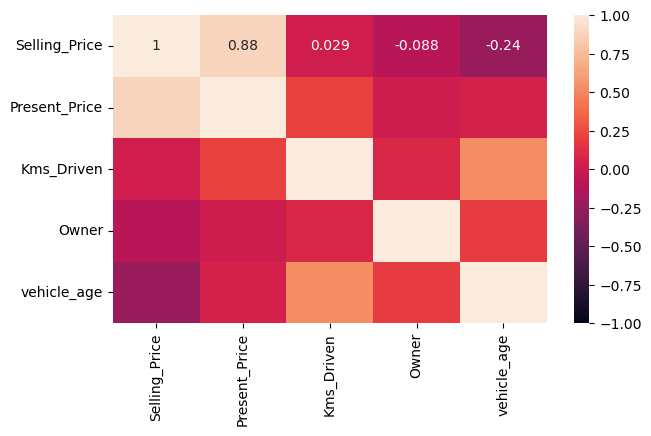

In [76]:
sns.heatmap(df.select_dtypes("number").corr(), 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show();

<Axes: xlabel='Selling_Price', ylabel='Count'>

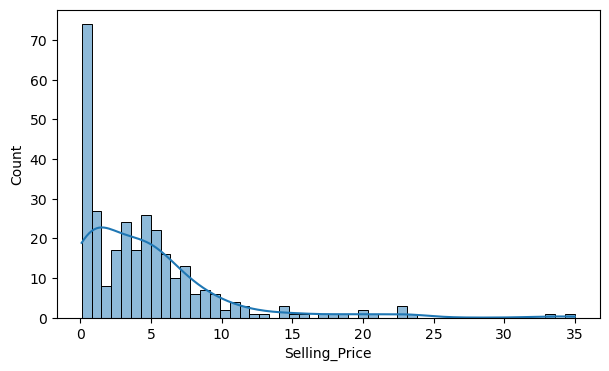

In [77]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<Axes: >

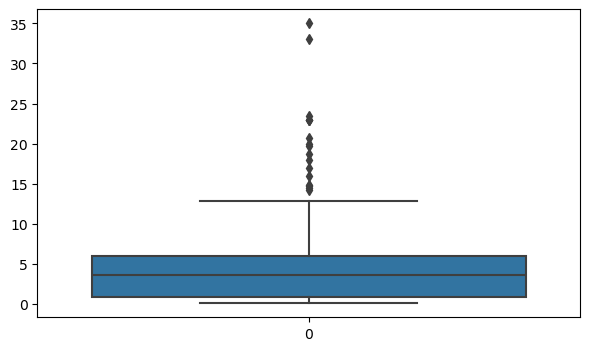

In [78]:
sns.boxplot(df.Selling_Price)

## Train test split

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.3500,5.5900,27000,Petrol,Dealer,Manual,0,9
1,4.7500,9.5400,43000,Diesel,Dealer,Manual,0,10
2,7.2500,9.8500,6900,Petrol,Dealer,Manual,0,6
3,2.8500,4.1500,5200,Petrol,Dealer,Manual,0,12
4,4.6000,6.8700,42450,Diesel,Dealer,Manual,0,9


In [81]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred, squared=True),
    "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_train, y_train_pred)
   },

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred, squared=True),
    "rmse": mean_squared_error(y_test, y_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_test, y_pred)
    }}
    
    return pd.DataFrame(scores)

In [84]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# adaboostregressor algoritması default olarak base_estimator=DecisionTreeRegressor(max_depth=3) kullanır.

# adaboostregressor'de  her agacın bulduğu predictionlar ağırlıklandırılarak nihai prediction döndürülür.

# örnek verecek olursak prediction için bir gözlemi modele veriyoruz;
# 1. agaç bu gözlemi 5 olarak tahmin etti;
# 2. agaç 7 olarak tahmin etti;
# 3. agaç  9 olarak tahmin etti.

# 1. agacın ağırlığı 2, ikinci agacın ağırlığı 1, üçüncü agacın ağırlığınında 0.5 olduğunu düşenelim.

# hesaplamayı yaparken ağırlıkları dikkate alarak aşağıdaki gibi yapar:
# pred = (1. agacın tahmini x 1. agacın ağırlığı + 2. agacın tahmini x 2. agacın ağırlığı + 
# 3. agacın tahmini x 3. agacın ağırlığı) / (1. agacın ağırlığı + 2. agacın ağırlığı + 3. agacın ağırlığı)
# (5x2 + 7x1 + 9x0.5) / (2 + 1 + 0.5) = 6.14

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [87]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting var görünüyor. CV ile teyit edeceğiz.

,train,test
R2,0.9623,0.9190
mae,0.4170,0.5489
mse,0.2746,0.5405
rmse,0.5240,0.7352
mape,0.4259,0.3267


In [88]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv =10, 
                        return_train_score=True,
                        return_indices=True)
index=scores.pop("indices")

pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]


test_r2                                     0.9049
train_r2                                    0.9625
test_neg_mean_absolute_error               -0.5199
train_neg_mean_absolute_error              -0.4015
test_neg_mean_squared_error                -0.6248
train_neg_mean_squared_error               -0.2726
test_neg_root_mean_squared_error           -0.7569
train_neg_root_mean_squared_error          -0.5217
test_neg_mean_absolute_percentage_error    -0.3719
train_neg_mean_absolute_percentage_error   -0.3338
dtype: float64

## Gridsearch for Adaboosting

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [90]:
param_grid = {"Ada_model__n_estimators":[10, 20, 30],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ['linear', 'square', 'exponential'] #linear mae, square mse
            }

# classificationdan farklı olarak base_estimator=DecisionTreeRegressor(max_depth=3)'dür. classificitinda max_dept=1'di.
# loss ağaç ağırlıklarının hesaplanması için kullanılacak loss functiona belirtir. Deafaultu linear'dir. En iyi loss function
# Gridsearch ile tespit edilmeli.
# yaprakların bölünme şartı için classificationda gini regressionda mse dikkate alınır.

In [91]:
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

# overfitingi gidermek için base estimator hyperparametreleriylede oynanabilir. Burda base estimatordaki max_depth=2 olarak
# düzenledik overfitingi giderdik

In [92]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square', 'exponential'],
                         'Ada_model__n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [93]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 20}

In [94]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=20, random_state=101))])

In [95]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.7115
mean_train_score   -0.5574
Name: 31, dtype: object

In [96]:
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(learning_rate=1,
                                              loss='square', 
                                              n_estimators=20, 
                                              random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                     0.9161
train_r2                                    0.9573
test_neg_mean_absolute_error               -0.4752
train_neg_mean_absolute_error              -0.4075
test_neg_mean_squared_error                -0.5479
train_neg_mean_squared_error               -0.3108
test_neg_root_mean_squared_error           -0.7115
train_neg_root_mean_squared_error          -0.5574
test_neg_mean_absolute_percentage_error    -0.2935
train_neg_mean_absolute_percentage_error   -0.2675
dtype: float64

# prediction = grid_model.predict(X_test)

ada_rmse=mean_squared_error(y_test, prediction, squared=False)
ada_mape=mean_absolute_percentage_error(y_test, prediction)


train_val(grid_model, X_train, y_train, X_test, y_test)

# CV ve test seti rmse skorları çok tutarlı.

In [137]:
ada_rmse=mean_squared_error(y_test, prediction, squared=False)
ada_mape=mean_absolute_percentage_error(y_test, prediction)


train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9459,0.9009
mae,0.4836,0.6034
mse,0.3938,0.6615
rmse,0.6275,0.8133
mape,0.5765,0.4512


## Feature importance

In [97]:
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(learning_rate=1,
                                              loss='square', 
                                              n_estimators=20, 
                                              random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=20, random_state=101))])

In [98]:
pipe_model["Ada_model"].feature_importances_

array([0.07529136, 0.09763278, 0.00323458, 0.57577149, 0.08091136,
       0.        , 0.16715843])

In [99]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [100]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,
                         columns=['ada_Importance'], 
                         index=features)

ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.5758
vehicle_age,0.1672
Seller_Type,0.0976
Kms_Driven,0.0809
Fuel_Type,0.0753
Transmission,0.0032
Owner,0.0000


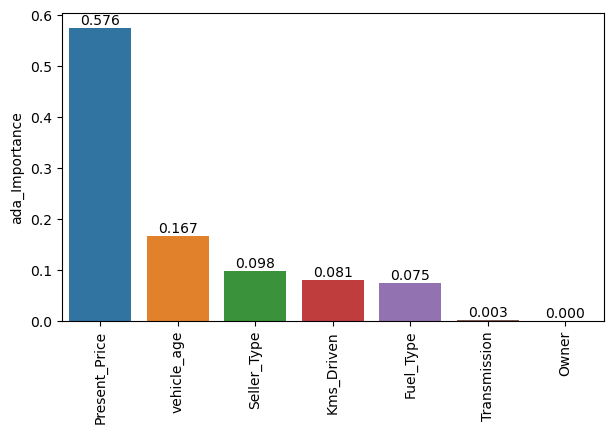

In [101]:
ax = sns.barplot(data=ada_imp_feats,
                 x=ada_imp_feats.index,
                 y='ada_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [103]:
# datamızda 2 araba olsun ilk araba fiyatı 100, ikinci araba fiyatı 200
# initial price (arabaların ortalama fiyatı): (100+200)/2 = 150
# ilk arabanın ilk residual değeri 100-150 = -50
# ilk arabanın ikinci residual değeri -30
# ikinci arabanın ilk residual değeri 200-150 = 50
# ikinci arabanın ikinci residual değeri 25
# modelimiz 2 agaçtan oluşuyor.
# learning rate: 0.1

# ilk araba fiyat tahmini   :150 + 0.1 * (-50) + 0.1*(-30)

# ikinci araba fiyat tahmini: 150 + 0.1 * 50 + 0.1*25

# Regression problemlerinde datadaki tüm gözlemlerin ortalaması alınır. Bu sabit değerler ile gerçek değerler arasındaki 
# fark (resdualler) hesaplanır. Ve model bu residualleri 0'a yakınsatmaya çalışır. 

# clasificationda olduğu gibi her agaçta hesaplanan residual değeri ile learning rate çarpılıp başlangıç değerine ilave edilerek
# tahmin yapılacak.

# Tüm arabaların ortalama değeri arabaların başlangıç değeri olacak. Ve her agaçta bulunan değerler bu başlangıç değerine 
# ilave edilecek.

In [104]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9927,0.9477
mae,0.1611,0.4161
mse,0.0532,0.3490
rmse,0.2307,0.5908
mape,0.0736,0.1635


In [105]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                                     0.9360
train_r2                                    0.9935
test_neg_mean_absolute_error               -0.3954
train_neg_mean_absolute_error              -0.1517
test_neg_mean_squared_error                -0.4139
train_neg_mean_squared_error               -0.0472
test_neg_root_mean_squared_error           -0.6130
train_neg_root_mean_squared_error          -0.2172
test_neg_mean_absolute_percentage_error    -0.1732
train_neg_mean_absolute_percentage_error   -0.0703
dtype: float64

## Gridsearch for Gradientboosting

In [106]:
param_grid = {"GB_model__n_estimators":[20, 35], 
              "GB_model__subsample":[0.8, 1], 
              "GB_model__max_features" : [5,6, None],
              "GB_model__learning_rate": [0.08, 0.1, 0.2], 
              'GB_model__max_depth':[1,2],
              'GB_model__min_samples_split':[2,3],
              'GB_model__min_samples_leaf':[1,2]}

# classificationdan en önemli farkı loss='squared_error'dür. Classifciationda bu logloss'tu hatırlarsanız.

In [107]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [108]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.08, 0.1, 0.2],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [5, 6, None],
                         'GB_model__min_samples_leaf': [1, 2],
                         'GB_model__min_samples_split': [2, 3],
                         'GB_model__n_estimators': [20, 35],
                         'GB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [109]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                           max_features=5, n_estimators=35,
                                           random_state=101, subsample=0.8))])

In [110]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.6010
mean_train_score   -0.4360
Name: 242, dtype: object

In [111]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(learning_rate=0.2, 
                                                     max_depth=2, 
                                                     max_features=5,
                                                     n_estimators=35,
                                                     subsample=0.8,
                                                     random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                     0.9465
train_r2                                    0.9738
test_neg_mean_absolute_error               -0.4274
train_neg_mean_absolute_error              -0.3221
test_neg_mean_squared_error                -0.3681
train_neg_mean_squared_error               -0.1904
test_neg_root_mean_squared_error           -0.6010
train_neg_root_mean_squared_error          -0.4360
test_neg_mean_absolute_percentage_error    -0.2250
train_neg_mean_absolute_percentage_error   -0.2012
dtype: float64

In [112]:
prediction = grid_model.predict(X_test)

gradient_rmse = mean_squared_error(y_test, prediction, squared=False)
gradient_mape=mean_absolute_percentage_error(y_test, prediction)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9728,0.9505
mae,0.3332,0.4445
mse,0.1979,0.3307
rmse,0.4448,0.5750
mape,0.2067,0.2335


## Feature importance

In [113]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(learning_rate=0.2, 
                                                     max_depth=2, 
                                                     max_features=5,
                                                     n_estimators=35,
                                                     subsample=0.8,
                                                     random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                           max_features=5, n_estimators=35,
                                           random_state=101, subsample=0.8))])

In [114]:
pipe_model["GB_model"].feature_importances_

array([1.26268232e-01, 1.67853365e-01, 1.43993941e-03, 5.65890576e-01,
       3.43143061e-02, 1.52119647e-04, 1.04081462e-01])

In [115]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,
                         columns=['grad_Importance'], 
                         index=features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.5659
Seller_Type,0.1679
Fuel_Type,0.1263
vehicle_age,0.1041
Kms_Driven,0.0343
Transmission,0.0014
Owner,0.0002


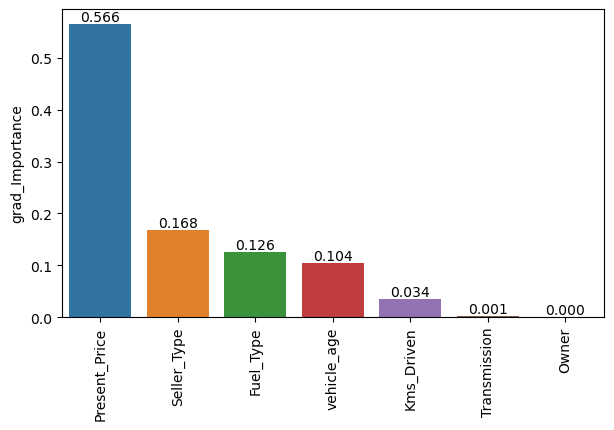

In [116]:
ax = sns.barplot(data=grad_imp_feats, 
                 x=grad_imp_feats.index, 
                 y='grad_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [117]:
import xgboost as xgb

xgb.__version__

'2.0.3'

In [118]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# classificationda objective='binary:logistic' iken regressionda 'reg:squarederror'dür. 
# diğer parametreler classificitonla aynıdır.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [119]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0000,0.9448
mae,0.0036,0.3691
mse,0.0000,0.3682
rmse,0.0051,0.6068
mape,0.0031,0.1408


In [120]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

# overfiting var.

test_r2                                     0.9355
train_r2                                    1.0000
test_neg_mean_absolute_error               -0.4075
train_neg_mean_absolute_error              -0.0028
test_neg_mean_squared_error                -0.4383
train_neg_mean_squared_error               -0.0000
test_neg_root_mean_squared_error           -0.6463
train_neg_root_mean_squared_error          -0.0041
test_neg_mean_absolute_percentage_error    -0.1556
train_neg_mean_absolute_percentage_error   -0.0021
dtype: float64

## Gridsearch for XGBoost

In [121]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [122]:
param_grid = {"XGB_model__n_estimators":[25, 30],
              "XGB_model__max_depth":[4,5], 
              "XGB_model__learning_rate": [0.05, 0.06],
              "XGB_model__subsample": [0.5, 0.8], 
              "XGB_model__colsample_bytree":[0.5, 0.8, 1],
              "XGB_model__colsample_bylevel":[0.5, 0.8, 1]
              }

In [123]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [124]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     bo...
                                                     num_parallel_tree=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.05, 0.06],
                         'XGB_model__max_depth': [4, 5],
                         'XGB_model__n_estimators': [25, 30],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [125]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 5,
 'XGB_model__n_estimators': 30,
 'XGB_model__subsample': 0.8}

In [126]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=30, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [127]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

# overfiting olmadığını gördük.

mean_test_score    -0.7983
mean_train_score   -0.6359
Name: 143, dtype: object

In [128]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.9068
train_r2                                    0.9444
test_neg_mean_absolute_error               -0.6005
train_neg_mean_absolute_error              -0.4835
test_neg_mean_squared_error                -0.6515
train_neg_mean_squared_error               -0.4044
test_neg_root_mean_squared_error           -0.7983
train_neg_root_mean_squared_error          -0.6359
test_neg_mean_absolute_percentage_error    -0.6156
train_neg_mean_absolute_percentage_error   -0.5780
dtype: float64

In [129]:
prediction = grid_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, prediction, squared=False)
xgb_mape=mean_absolute_percentage_error(y_test, prediction)

train_val(grid_model, X_train, y_train, X_test, y_test) 

,train,test
R2,0.9459,0.9009
mae,0.4836,0.6034
mse,0.3938,0.6615
rmse,0.6275,0.8133
mape,0.5765,0.4512


## Feature importance

In [130]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=30, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [131]:
pipe_model["XGB_model"].feature_importances_

array([0.02077694, 0.04598543, 0.00668861, 0.7394075 , 0.03430203,
       0.00364026, 0.14919925], dtype=float32)

In [132]:
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [133]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=features)

xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.7394
vehicle_age,0.1492
Seller_Type,0.0460
Kms_Driven,0.0343
Fuel_Type,0.0208
Transmission,0.0067
Owner,0.0036


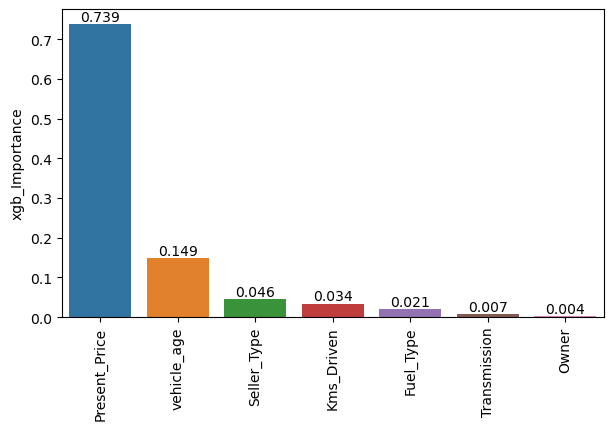

In [134]:
ax = sns.barplot(data=xgb_imp_feats, 
                 x=xgb_imp_feats.index, 
                 y='xgb_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [135]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.7394,0.5659,0.5758
vehicle_age,0.1492,0.1041,0.1672
Seller_Type,0.0460,0.1679,0.0976
Kms_Driven,0.0343,0.0343,0.0809
Fuel_Type,0.0208,0.1263,0.0753
Transmission,0.0067,0.0014,0.0032
Owner,0.0036,0.0002,0.0000


## compare scores

[Text(0, 0, '0.234'), Text(0, 0, '0.451'), Text(0, 0, '0.451')]

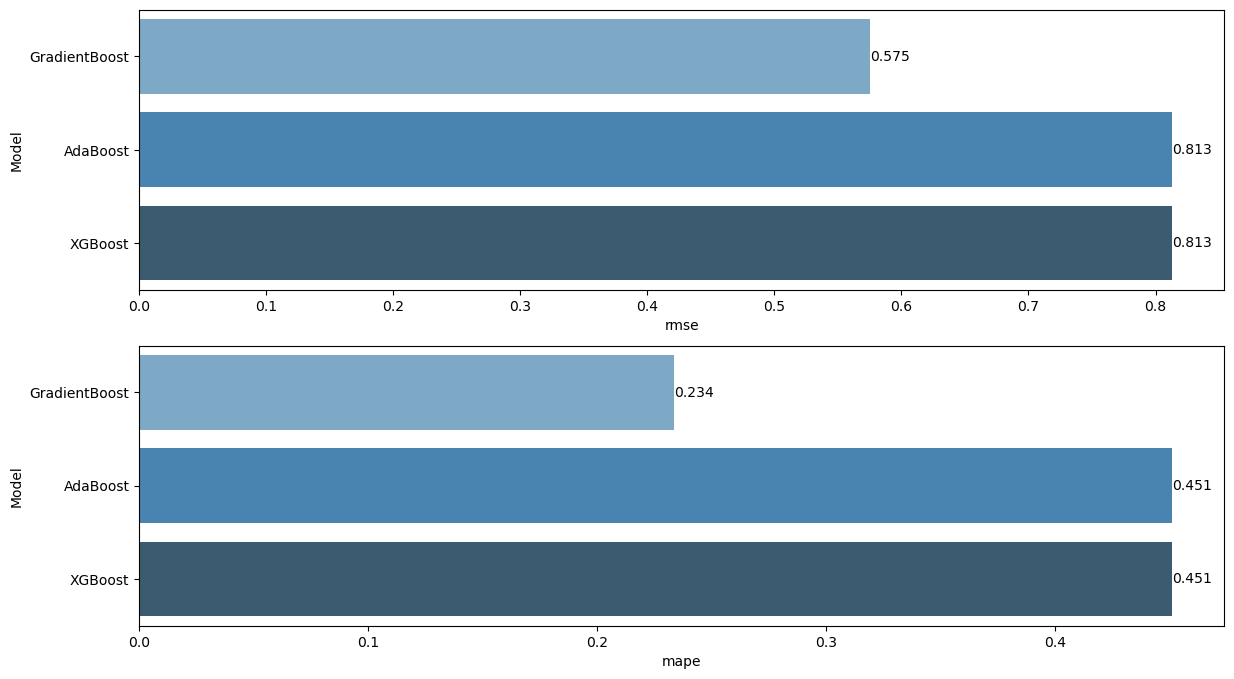

In [138]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost"],
                        "rmse": [ada_rmse, gradient_rmse, xgb_rmse],
                        "mape": [ada_mape, gradient_mape, xgb_mape]})

plt.figure(figsize=(14,8))
plt.subplot(211)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(212)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


## Feature Selection and Final Model

In [139]:
X2 = X[["Present_Price", "Seller_Type", "vehicle_age"]]
X2.head()

,Present_Price,Seller_Type,vehicle_age
0,5.5900,Dealer,9
1,9.5400,Dealer,10
2,9.8500,Dealer,6
3,4.1500,Dealer,12
4,6.8700,Dealer,9


In [140]:
cat2 = X2.select_dtypes("object").columns
cat2

Index(['Seller_Type'], dtype='object')

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Seller_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsamp...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=30, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [142]:
pipe_model["OrdinalEncoder"].fit_transform(X2).head()

,Seller_Type,Present_Price,vehicle_age
0,0.0000,5.5900,9
1,0.0000,9.5400,10
2,0.0000,9.8500,6
3,0.0000,4.1500,12
4,0.0000,6.8700,9


## Prediction

In [143]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[7, 9]}

In [144]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0000,25000,Petrol,Dealer,Manual,0,7
1,9.5000,44000,Diesel,Individual,Automatic,1,9


In [145]:
pipe_model.predict(df_samples)

array([4.9200096, 5.785931 ], dtype=float32)